### Explorative Analyse der Smartmeter Daten

In [4]:
import sys
import os
sys.path.append(os.path.abspath("../src"))

from data_loader import smartmeter_load
import seaborn as sns
import matplotlib as plt
import polars as pl

In [5]:
smart_meter = smartmeter_load(data_path ='../data/raw/households')
smart_meter

timestamp,timestamp_local,date,household_id,group_assignment,affects_timepoint,kwh_received_total,kwh_received_heatpump,kwh_received_other,kwh_returned_total
"datetime[μs, UTC]","datetime[μs, Europe/Zurich]",date,str,str,str,f64,f64,f64,f64
2019-03-02 23:59:59 UTC,2019-03-03 00:59:59 CET,2019-03-03,"""100101""","""control""","""unknown""",18.33,null,null,8.64
2019-03-03 23:59:59 UTC,2019-03-04 00:59:59 CET,2019-03-04,"""100101""","""control""","""unknown""",15.03,null,null,9.04
2019-03-04 23:59:59 UTC,2019-03-05 00:59:59 CET,2019-03-05,"""100101""","""control""","""unknown""",16.69,null,null,4.57
2019-03-05 23:59:59 UTC,2019-03-06 00:59:59 CET,2019-03-06,"""100101""","""control""","""unknown""",29.52,null,null,15.27
2019-03-06 23:59:59 UTC,2019-03-07 00:59:59 CET,2019-03-07,"""100101""","""control""","""unknown""",16.81,null,null,14.43
…,…,…,…,…,…,…,…,…,…
2024-03-16 23:59:59 UTC,2024-03-17 00:59:59 CET,2024-03-17,"""998181""","""control""","""unknown""",10.14,null,null,5.7
2024-03-17 23:59:59 UTC,2024-03-18 00:59:59 CET,2024-03-18,"""998181""","""control""","""unknown""",12.9,null,null,0.65
2024-03-18 23:59:59 UTC,2024-03-19 00:59:59 CET,2024-03-19,"""998181""","""control""","""unknown""",13.83,null,null,0.16


In [6]:
smart_meter.describe()


statistic,timestamp,timestamp_local,date,household_id,group_assignment,affects_timepoint,kwh_received_total,kwh_received_heatpump,kwh_received_other,kwh_returned_total
str,str,str,str,str,str,str,f64,f64,f64,f64
"""count""","""936026""","""936026""","""936026""","""936026""","""936026""","""936026""",916807.0,35694.0,29075.0,230402.0
"""null_count""","""0""","""0""","""0""","""0""","""0""","""0""",19219.0,900332.0,906951.0,705624.0
"""mean""","""2022-04-12 11:46:29.668635+00:…","""2022-04-12 13:46:29.668635+02:…","""2022-04-12 11:46:30.668635""",null,null,null,27.785552,21.378717,20.821304,17.992046
"""std""",null,null,null,null,null,null,23.272086,29.524287,20.726929,21.587601
"""min""","""2018-11-02 23:59:59+00:00""","""2018-11-03 00:59:59+01:00""","""2018-11-03""","""100101""","""control""","""after visit""",0.01,0.01,0.3,0.01
"""25%""","""2021-03-17 23:59:59+00:00""","""2021-03-18 00:59:59+01:00""","""2021-03-18""",null,null,null,12.6,5.56,9.3,1.27
"""50%""","""2022-08-30 23:59:59+00:00""","""2022-08-31 01:59:59+02:00""","""2022-08-31""",null,null,null,22.48,13.85,14.95,10.18
"""75%""","""2023-06-18 23:59:59+00:00""","""2023-06-19 01:59:59+02:00""","""2023-06-19""",null,null,null,37.09,28.08,23.63,27.7
"""max""","""2024-03-20 23:59:59+00:00""","""2024-03-21 00:59:59+01:00""","""2024-03-21""","""998181""","""treatment""","""unknown""",4689.98,401.96,171.97,223.36


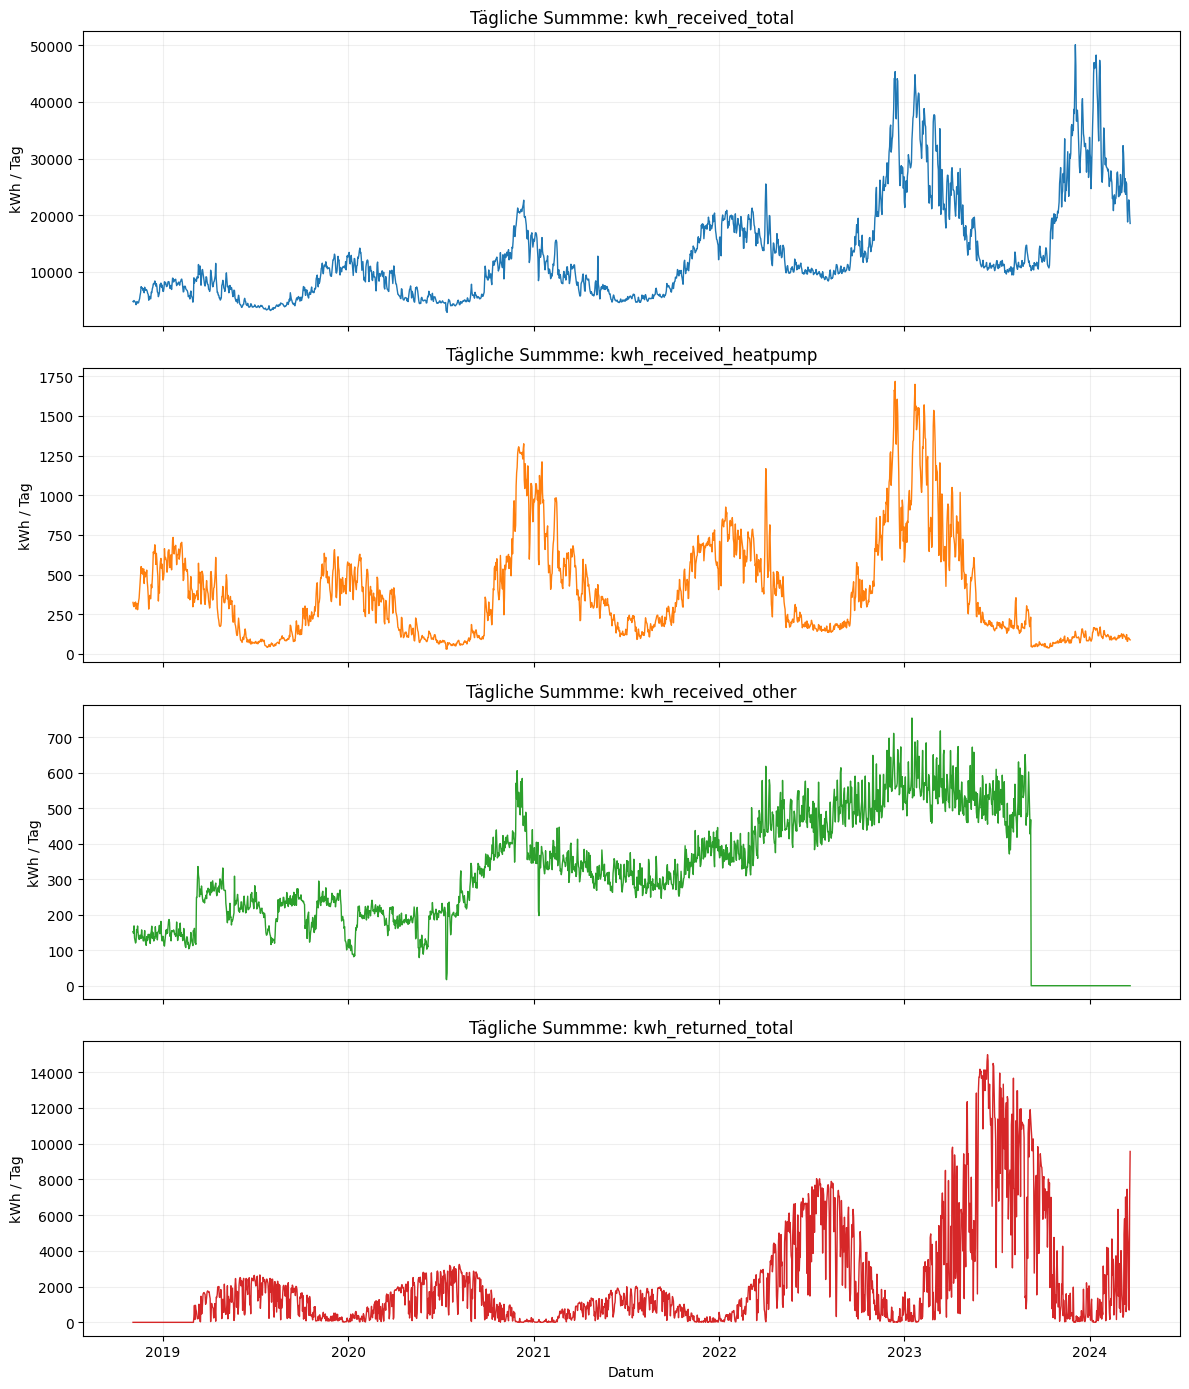

In [7]:

smart_meter = smart_meter.with_columns(
    pl.col("timestamp_local").dt.date().alias("date")
)

smart_meter_sum = (smart_meter.group_by('date').agg([
                                                        pl.col("kwh_received_total").sum(),
                                                        pl.col("kwh_received_heatpump").sum(),
                                                        pl.col("kwh_received_other").sum(),
                                                        pl.col("kwh_returned_total").sum()
                                                        ]).sort("date"))

import matplotlib.pyplot as plt

metrics = ["kwh_received_total", "kwh_received_heatpump", "kwh_received_other", "kwh_returned_total"]
fig, axes = plt.subplots(len(metrics), 1, figsize=(12, 14), sharex=True)

for i, col in enumerate(metrics):
    # Polars Series direkt plotten
    axes[i].plot(
        smart_meter_sum["date"], 
        smart_meter_sum[col], 
        color=f"C{i}",
        linewidth=1
    )
    axes[i].set_title(f"Tägliche Summme: {col}", fontsize=12)
    axes[i].set_ylabel("kWh / Tag")
    axes[i].grid(True, alpha=0.2)

plt.xlabel("Datum")
plt.tight_layout()
plt.show()

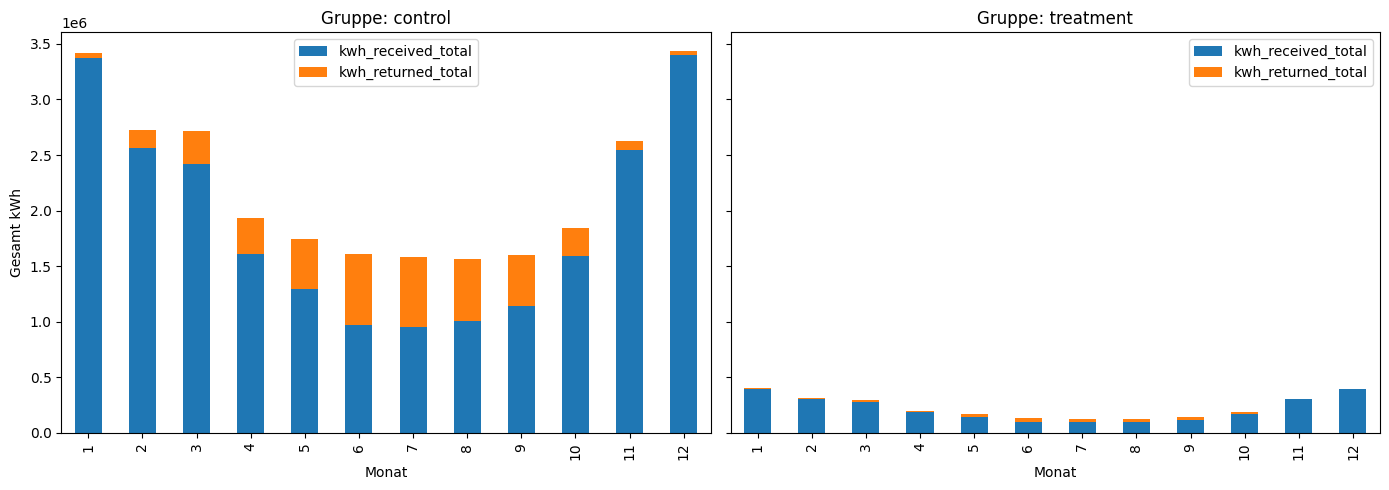

In [8]:
import matplotlib.pyplot as plt

# Wir berechnen die Summen pro Gruppe und Monat für einen besseren Überblick
# Falls du 'date' noch nicht hast, vorher: .with_columns(pl.col("timestamp").dt.date().alias("date"))
plot_df = (
    smart_meter
    .with_columns(pl.col("date").dt.month().alias("month"))
    .group_by(["group_assignment", "month"])
    .agg([
        pl.col("kwh_received_total").sum(),
        pl.col("kwh_returned_total").sum()
    ])
    .sort("month")
)

# Plotten
groups = plot_df["group_assignment"].unique().to_list()
fig, axes = plt.subplots(1, len(groups), figsize=(14, 5), sharey=True)

for i, group in enumerate(groups):
    # Filter für die aktuelle Gruppe und Umwandlung zu Pandas nur für den Plot
    group_data = plot_df.filter(pl.col("group_assignment") == group).to_pandas()
    
    # Bar-Plot: Received vs Returned
    group_data.set_index("month")[["kwh_received_total", "kwh_returned_total"]].plot(
        kind="bar", 
        stacked=True, 
        ax=axes[i],
        color=["#1f77b4", "#ff7f0e"] # Blau für Bezug, Orange für Rückspeisung
    )
    
    axes[i].set_title(f"Gruppe: {group}")
    axes[i].set_xlabel("Monat")
    axes[i].set_ylabel("Gesamt kWh")

plt.tight_layout()
plt.show()

## Explorative Analyse der Wetterdaten

In [9]:
import sys
import os
sys.path.append(os.path.abspath("../src"))
from data_loader import  weather_load

weather_data = weather_load(data_path ='../data/raw/weather')
weather_data.describe()

statistic,date,weather_id,temperature_avg_daily,temperature_max_daily,temperature_min_daily,heatingdegree_sia_daily,heatingdegree_us_daily,coolingdegree_us_daily,humidity_avg_daily,precipitation_total_daily,sunshine_duration_daily,timestamp_local
str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,str
"""count""","""1885""","""1885""",1885.0,1885.0,1885.0,1885.0,1885.0,1885.0,1885.0,1885.0,1885.0,"""1885"""
"""null_count""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0"""
"""mean""","""2021-07-31 00:00:00""",null,10.618568,15.594748,5.431406,8.460584,8.196499,0.515066,76.507586,2.662918,5.003289,"""2021-07-31 02:00:00+02:00"""
"""std""",null,null,7.273397,8.74089,6.455998,7.886636,6.517768,1.404647,12.188068,5.645564,4.689027,null
"""min""","""2019-01-01""","""8jB""",-8.3,-5.3,-14.8,0.0,0.0,0.0,42.6,0.0,0.0,"""2019-01-01 01:00:00+01:00"""
"""25%""","""2020-04-16""",null,4.8,8.7,0.0,0.0,1.4,0.0,68.0,0.0,0.4,"""2020-04-16 02:00:00+02:00"""
"""50%""","""2021-07-31""",null,10.4,15.2,5.3,9.6,7.9,0.0,77.9,0.0,3.9,"""2021-07-31 02:00:00+02:00"""
"""75%""","""2022-11-14""",null,16.9,22.7,10.9,15.2,13.5,0.0,86.3,2.8,8.9,"""2022-11-14 01:00:00+01:00"""
"""max""","""2024-02-28""","""8jB""",27.2,36.7,19.2,28.3,26.6,8.9,99.4,53.0,14.9,"""2024-02-28 01:00:00+01:00"""


In [10]:
print(weather_data.schema)

Schema([('date', Date), ('weather_id', String), ('temperature_avg_daily', Float64), ('temperature_max_daily', Float64), ('temperature_min_daily', Float64), ('heatingdegree_sia_daily', Float64), ('heatingdegree_us_daily', Float64), ('coolingdegree_us_daily', Float64), ('humidity_avg_daily', Float64), ('precipitation_total_daily', Float64), ('sunshine_duration_daily', Float64), ('timestamp_local', Datetime(time_unit='us', time_zone='Europe/Zurich'))])


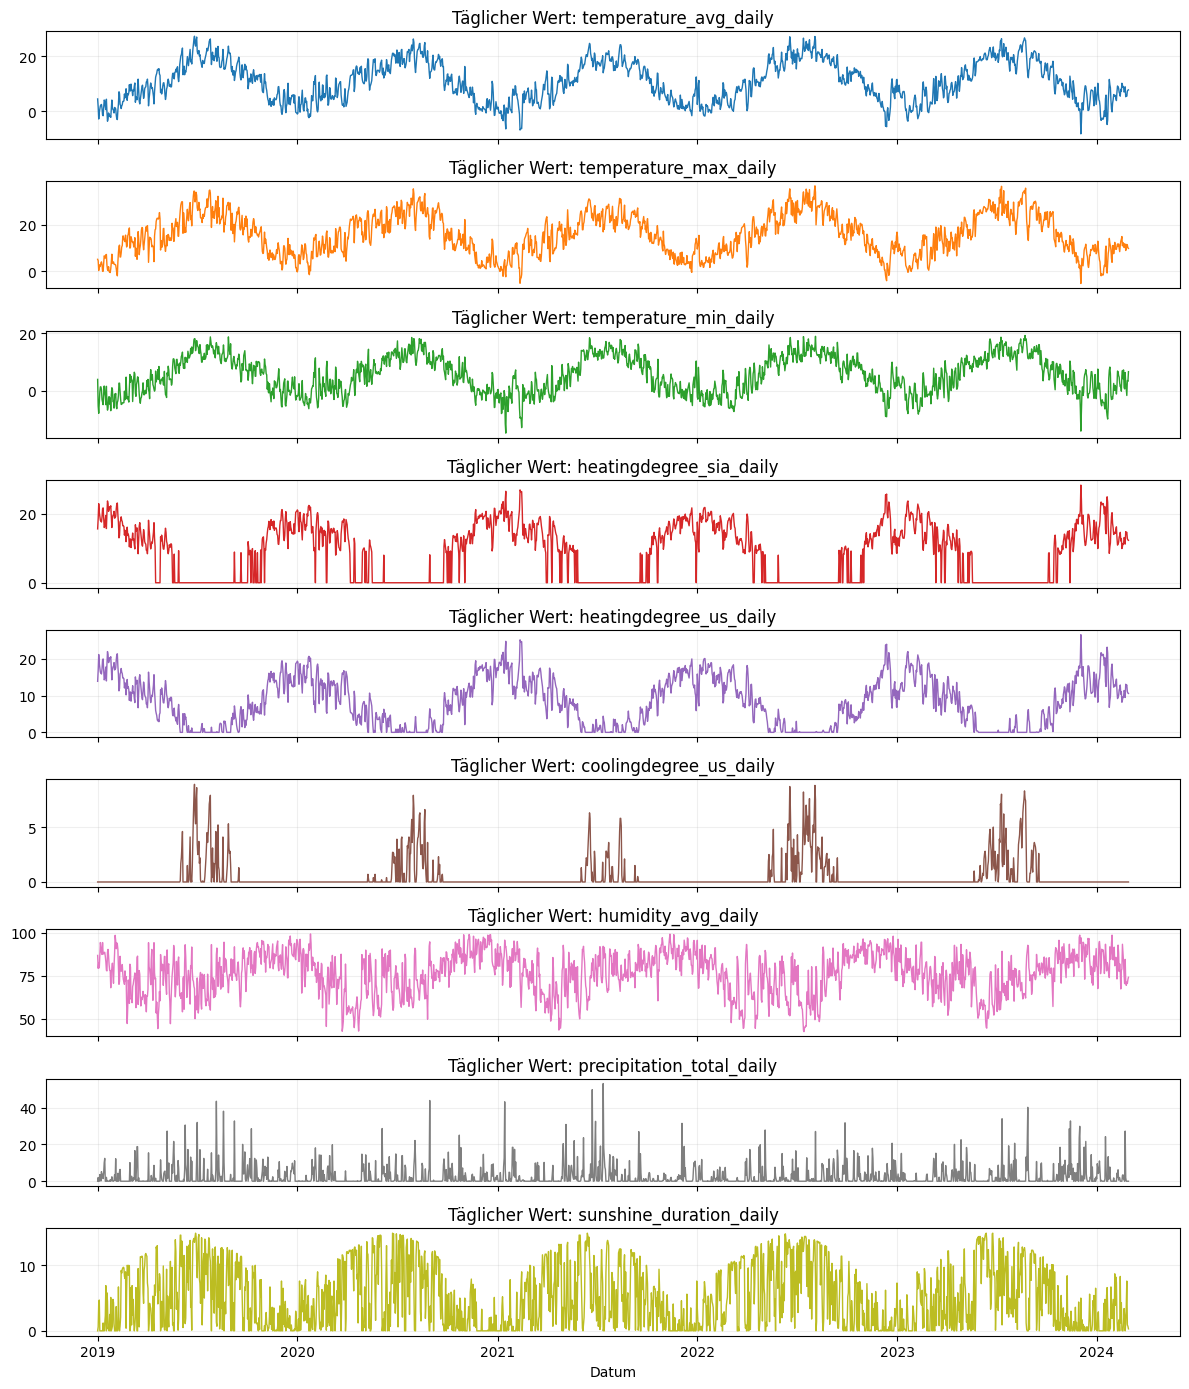

In [11]:

import matplotlib.pyplot as plt

metrics = ["temperature_avg_daily", "temperature_max_daily", "temperature_min_daily", "heatingdegree_sia_daily", "heatingdegree_us_daily","coolingdegree_us_daily","humidity_avg_daily",
           "precipitation_total_daily","sunshine_duration_daily"]
fig, axes = plt.subplots(len(metrics), 1, figsize=(12, 14), sharex=True)

for i, col in enumerate(metrics):
    # Polars Series direkt plotten
    axes[i].plot(
        weather_data["date"], 
        weather_data[col], 
        label=f"Daily Avg {col}", 
        color=f"C{i}",
        linewidth=1
    )
    axes[i].set_title(f"Täglicher Wert: {col}", fontsize=12)
    axes[i].grid(True, alpha=0.2)

plt.xlabel("Datum")
plt.tight_layout()
plt.show()

# Explorative Analyse der Technischen Haushaltsdaten

In [ ]:
import sys
import os

# Wir gehen eine Ebene höher zum Projekt-Root und fügen 'src' hinzu
sys.path.append(os.path.abspath("../src"))

# Jetzt sollte der Import klappen
from data_loader import household_load

household_info = household_load(data_path ='../data/raw/households_info/')
household_info.describe()

statistic,household_id,group,weather_id,installation_haspvsystem,protocols_available,protocols_hasmultiplevisits,protocols_reportids,metadata_available,smartmeterdata_available_15min,smartmeterdata_available_daily,smartmeterdata_available_monthly
str,f64,str,str,f64,f64,f64,str,f64,f64,f64,f64
"""count""",1408.0,"""1408""","""1408""",650.0,1408.0,1408.0,"""214""",1408.0,1408.0,1408.0,1408.0
"""null_count""",0.0,"""0""","""0""",758.0,0.0,0.0,"""1194""",0.0,0.0,0.0,0.0
"""mean""",2.1601e6,null,null,0.793846,0.151989,0.002131,null,0.964489,0.99929,0.921875,0.897727
"""std""",2.9614e6,null,null,null,null,null,null,null,null,null,null
"""min""",1060.0,"""control""","""8jB""",0.0,0.0,0.0,"""[137]""",0.0,0.0,0.0,0.0
"""25%""",412211.0,null,null,null,null,null,null,null,null,null,null
"""50%""",818882.0,null,null,null,null,null,null,null,null,null,null
"""75%""",1.189811e6,null,null,null,null,null,null,null,null,null,null
"""max""",9.981041e6,"""treatment""","""z6I""",1.0,1.0,1.0,"""[40]""",1.0,1.0,1.0,1.0


In [6]:
household_info.schema

Schema([('household_id', Int64),
        ('group', String),
        ('weather_id', String),
        ('installation_haspvsystem', Boolean),
        ('protocols_available', Boolean),
        ('protocols_hasmultiplevisits', Boolean),
        ('protocols_reportids', String),
        ('metadata_available', Boolean),
        ('smartmeterdata_available_15min', Boolean),
        ('smartmeterdata_available_daily', Boolean),
        ('smartmeterdata_available_monthly', Boolean)])

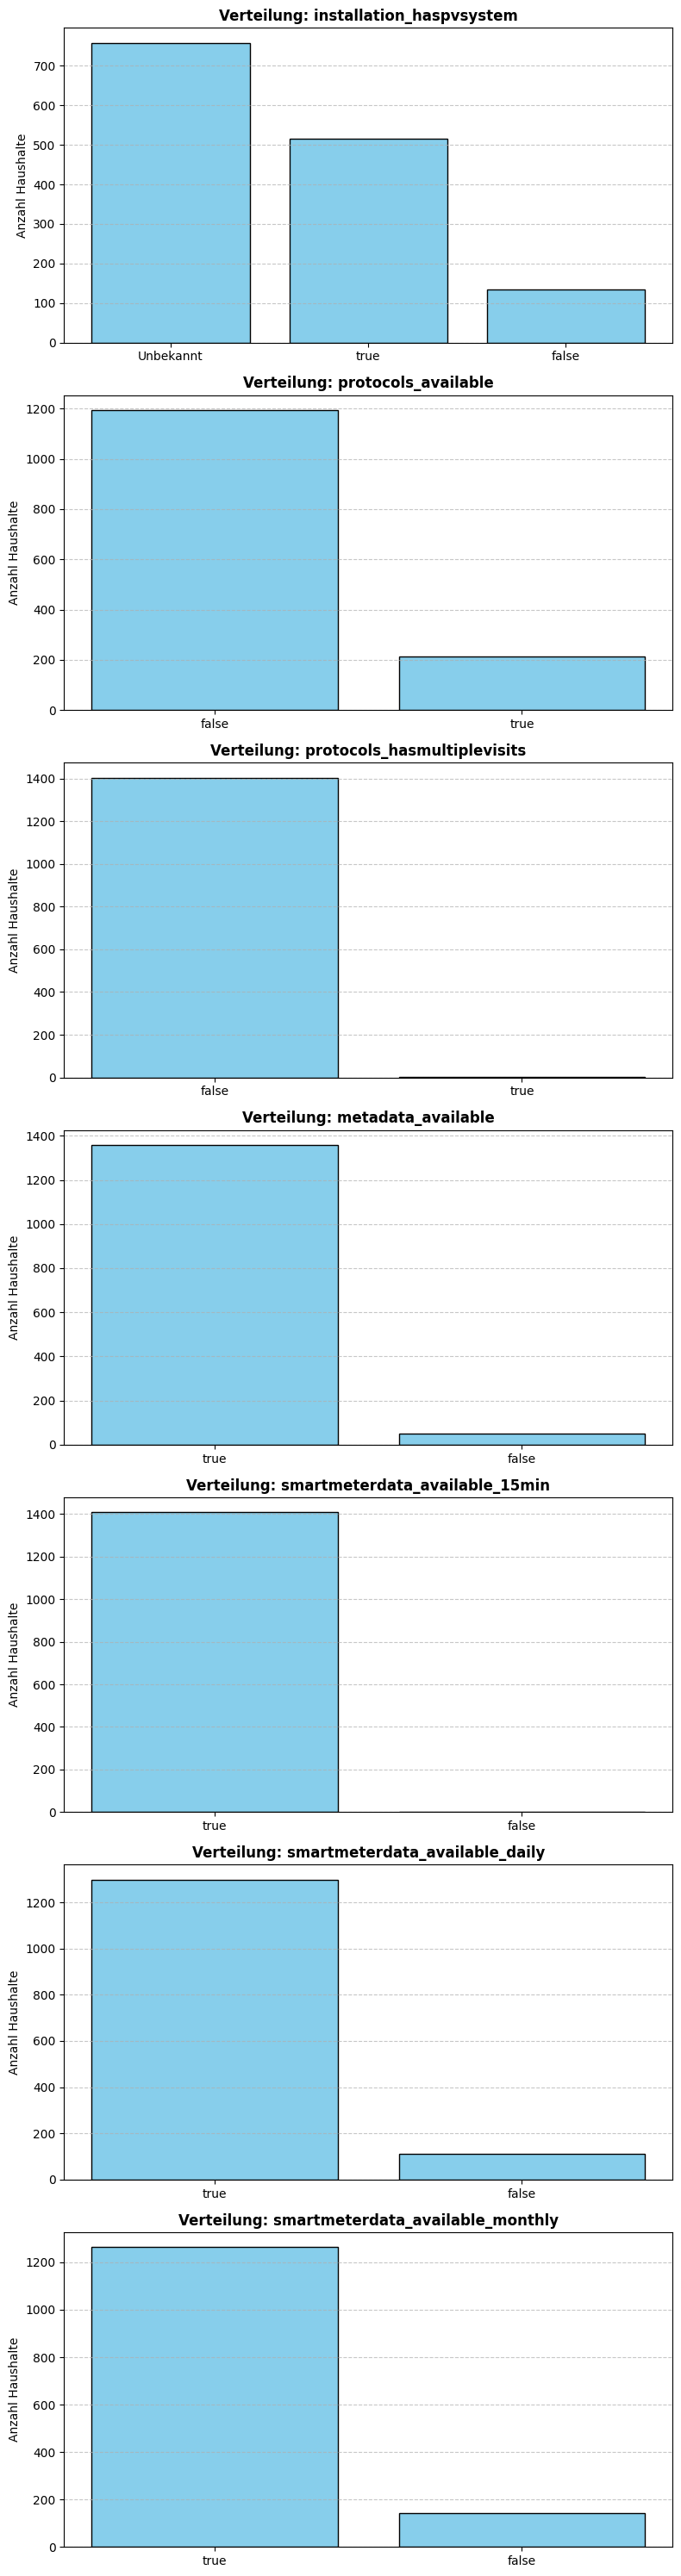

In [15]:
import polars as pl
import matplotlib.pyplot as plt

metrics = [
    "installation_haspvsystem", "protocols_available", "protocols_hasmultiplevisits", 
    "metadata_available", "smartmeterdata_available_15min", 
    "smartmeterdata_available_daily", "smartmeterdata_available_monthly"
]

fig, axes = plt.subplots(len(metrics), 1, figsize=(8, 30))

for i, col in enumerate(metrics):
    # Wir greifen direkt auf die Spalte zu (Series), füllen nulls und zählen dann
    counts = (
        household_info[col]
        .fill_null("Unbekannt")
        .value_counts()
        .sort(by="count", descending=True)
    )
    
    # Da counts nun ein DataFrame mit der Spalte 'col' und 'count' ist:
    x_labels = counts[col].cast(pl.String).to_list()
    y_values = counts["count"].to_list()
    
    axes[i].bar(x_labels, y_values, color="skyblue", edgecolor="black")
    
    axes[i].set_title(f"Verteilung: {col}", fontsize=12, fontweight='bold')
    axes[i].set_ylabel("Anzahl Haushalte")
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Explorative Analyse der Meta Informationen zum Haushalt

In [1]:
import sys
import os

# Wir gehen eine Ebene höher zum Projekt-Root und fügen 'src' hinzu
sys.path.append(os.path.abspath("../src"))

# Jetzt sollte der Import klappen
from data_loader import household_metainfo_load

household_info = household_metainfo_load(data_path ='../data/raw/protocols/')
household_info.describe()

statistic,report_id,household_id,visit_year,visit_date,building_type,building_housingunits,building_constructionyear,building_constructionyear_interval,building_renovated_windows,building_renovated_roof,building_renovated_walls,building_renovated_floor,building_floorareaheated_total,building_floorareaheated_basement,building_floorareaheated_groundfloor,building_floorareaheated_firstfloor,building_floorareaheated_secondfloor,building_floorareaheated_topfloor,building_floorareaheated_additionalareasplanned,building_floorareaheated_additionalareasplannedsize,building_residents,building_pvsystem_available,building_pvsystem_size,building_electricvehicle_available,heatpump_installation_type,heatpump_installation_year,heatpump_installation_manufacturer,heatpump_installation_model,heatpump_installation_heatingcapacity,heatpump_installation_refrigerant_type,heatpump_installation_refrigerant_content,heatpump_installation_normpoint,heatpump_installation_normpoint_cop,heatpump_installation_normpoint_electricpower,heatpump_installation_normpoint_heatingpower,heatpump_installation_location,…,heatpump_groundsource_brinecircuit_numberofholes,heatpump_groundsource_brinecircuit_coolingcapacity,heatpump_groundsource_brinecircuit_antifreezeexists,heatpump_groundsource_currentpressure,heatpump_groundsource_currentpressure_okay,heatpump_groundsource_currenttemperature,heatpump_groundsource_currenttemperature_okay,heatpump_heatingcurvesetting_toohigh_beforevisit,heatpump_heatingcurvesetting_changed,heatpump_heatingcurvesetting_outside20_beforevisit,heatpump_heatingcurvesetting_outside0_beforevisit,heatpump_heatingcurvesetting_outsideminus8_beforevisit,heatpump_heatingcurvesetting_outside20_aftervisit,heatpump_heatingcurvesetting_outside0_aftervisit,heatpump_heatingcurvesetting_outsideminus8_aftervisit,heatpump_heatinglimitsetting_toohigh_beforevisit,heatpump_heatinglimitsetting_changed,heatpump_heatinglimitsetting_beforevisit,heatpump_heatinglimitsetting_aftervisit,heatpump_nightsetbacksetting_activated_beforevisit,heatpump_nightsetbacksetting_activated_aftervisit,dhw_temperaturesetting_categorization,dhw_temperaturesetting_changed,dhw_temperaturesetting_beforevisit,dhw_temperaturesetting_aftervisit,dhw_storage_lastdescaling_toolongago,dhw_storage_lastdescaling_year,heatdistribution_expansiontank_pressure_categorization,heatdistribution_expansiontank_pressure_actual,heatdistribution_expansiontank_pressure_target,heatdistribution_expansiontank_systemheight,heatdistribution_circulation_pumpstageposition_changed,heatdistribution_circulation_pumpstageposition_beforevisit,heatdistribution_circulation_pumpstageposition_aftervisit,heatdistribution_recommendation_insulatepipes,heatdistribution_recommendation_installthermostaticvalve,heatdistribution_recommendation_installrpmvalve
str,f64,f64,f64,str,str,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,str,str,f64,str,f64,str,f64,f64,str,str,…,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",410.0,217.0,410.0,"""304""","""409""",217.0,382.0,"""408""",410.0,410.0,410.0,410.0,408.0,140.0,366.0,320.0,48.0,63.0,180.0,16.0,410.0,204.0,25.0,37.0,"""410""",150.0,"""402""","""377""",391.0,"""410""",385.0,"""65""",71.0,85.0,"""71""","""285""",…,13.0,9.0,165.0,8.0,164.0,21.0,26.0,375.0,269.0,404.0,400.0,402.0,58.0,56.0,65.0,383.0,110.0,116.0,95.0,387.0,362.0,"""394""",281.0,396.0,32.0,410.0,255.0,"""403""",351.0,354.0,409.0,357.0,22.0,25.0,410.0,410.0,410.0
"""null_count""",0.0,193.0,0.0,"""106""","""1""",193.0,28.0,"""2""",0.0,0.0,0.0,0.0,2.0,270.0,44.0,90.0,362.0,347.0,230.0,394.0,0.0,206.0,385.0,373.0,"""0""",260.0,"""8""","""33""",19.0,"""0""",25.0,"""345""",339.0,325.0,"""339""","""125""",…,397.0,401.0,245.0,402.0,246.0,389.0,384.0,35.0,141.0,6.0,10.0,8.0,352.0,354.0,345.0,27.0,300.0,294.0,315.0,23.0,48.0,"""16""",129.0,14.0,378.0,0.0,155.0,"""7""",59.0,56.0,1.0,53.0,38

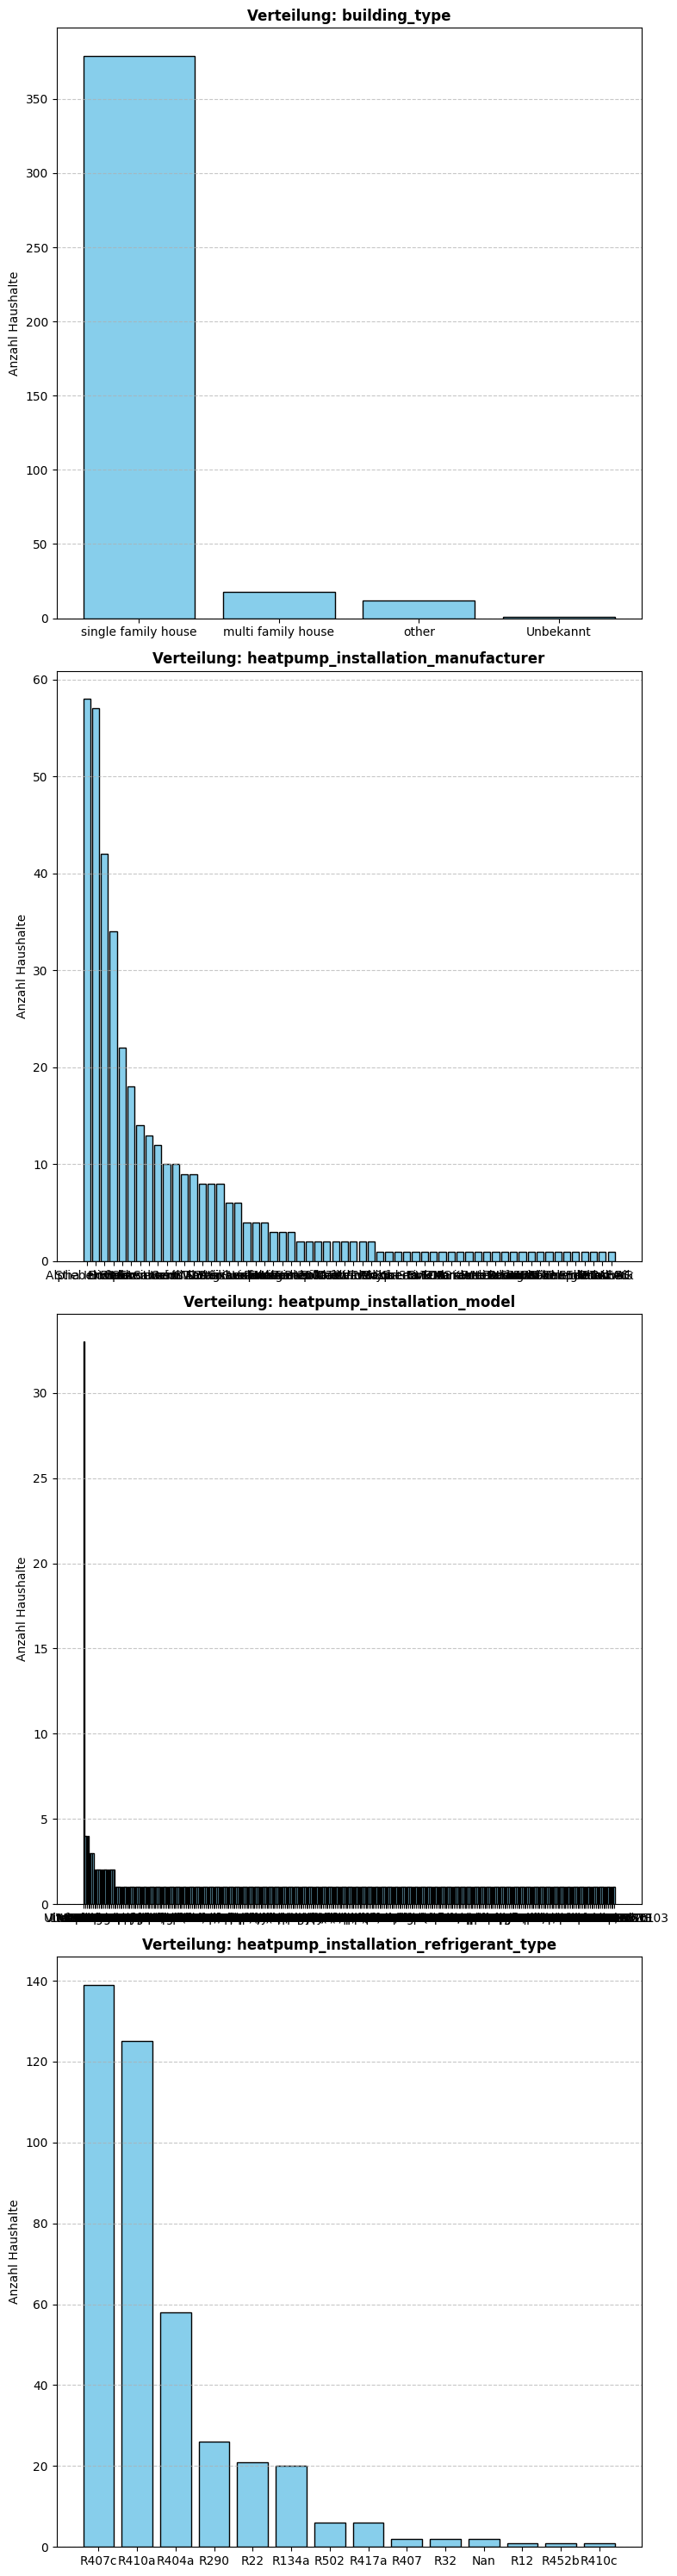

In [ ]:
import polars as pl
import matplotlib.pyplot as plt

metrics = [
    "building_type",, "heatpump_installation_manufacturer", "heatpump_installation_model", 
    "heatpump_installation_refrigerant_type"
]

fig, axes = plt.subplots(len(metrics), 1, figsize=(8, 30))

for i, col in enumerate(metrics):
    # Wir greifen direkt auf die Spalte zu (Series), füllen nulls und zählen dann
    counts = (
        household_info[col]
        .fill_null("Unbekannt")
        .value_counts()
        .sort(by="count", descending=True)
    )
    
    # Da counts nun ein DataFrame mit der Spalte 'col' und 'count' ist:
    x_labels = counts[col].cast(pl.String).to_list()
    y_values = counts["count"].to_list()
    
    axes[i].bar(x_labels, y_values, color="skyblue", edgecolor="black")
    
    axes[i].set_title(f"Verteilung: {col}", fontsize=12, fontweight='bold')
    axes[i].set_ylabel("Anzahl Haushalte")
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

C:\Users\maxkr\AppData\Local\Temp\ipykernel_26088\1945439464.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df.to_pandas(), x="heatpump_installation_type", y="heatpump_installation_normpoint_cop",


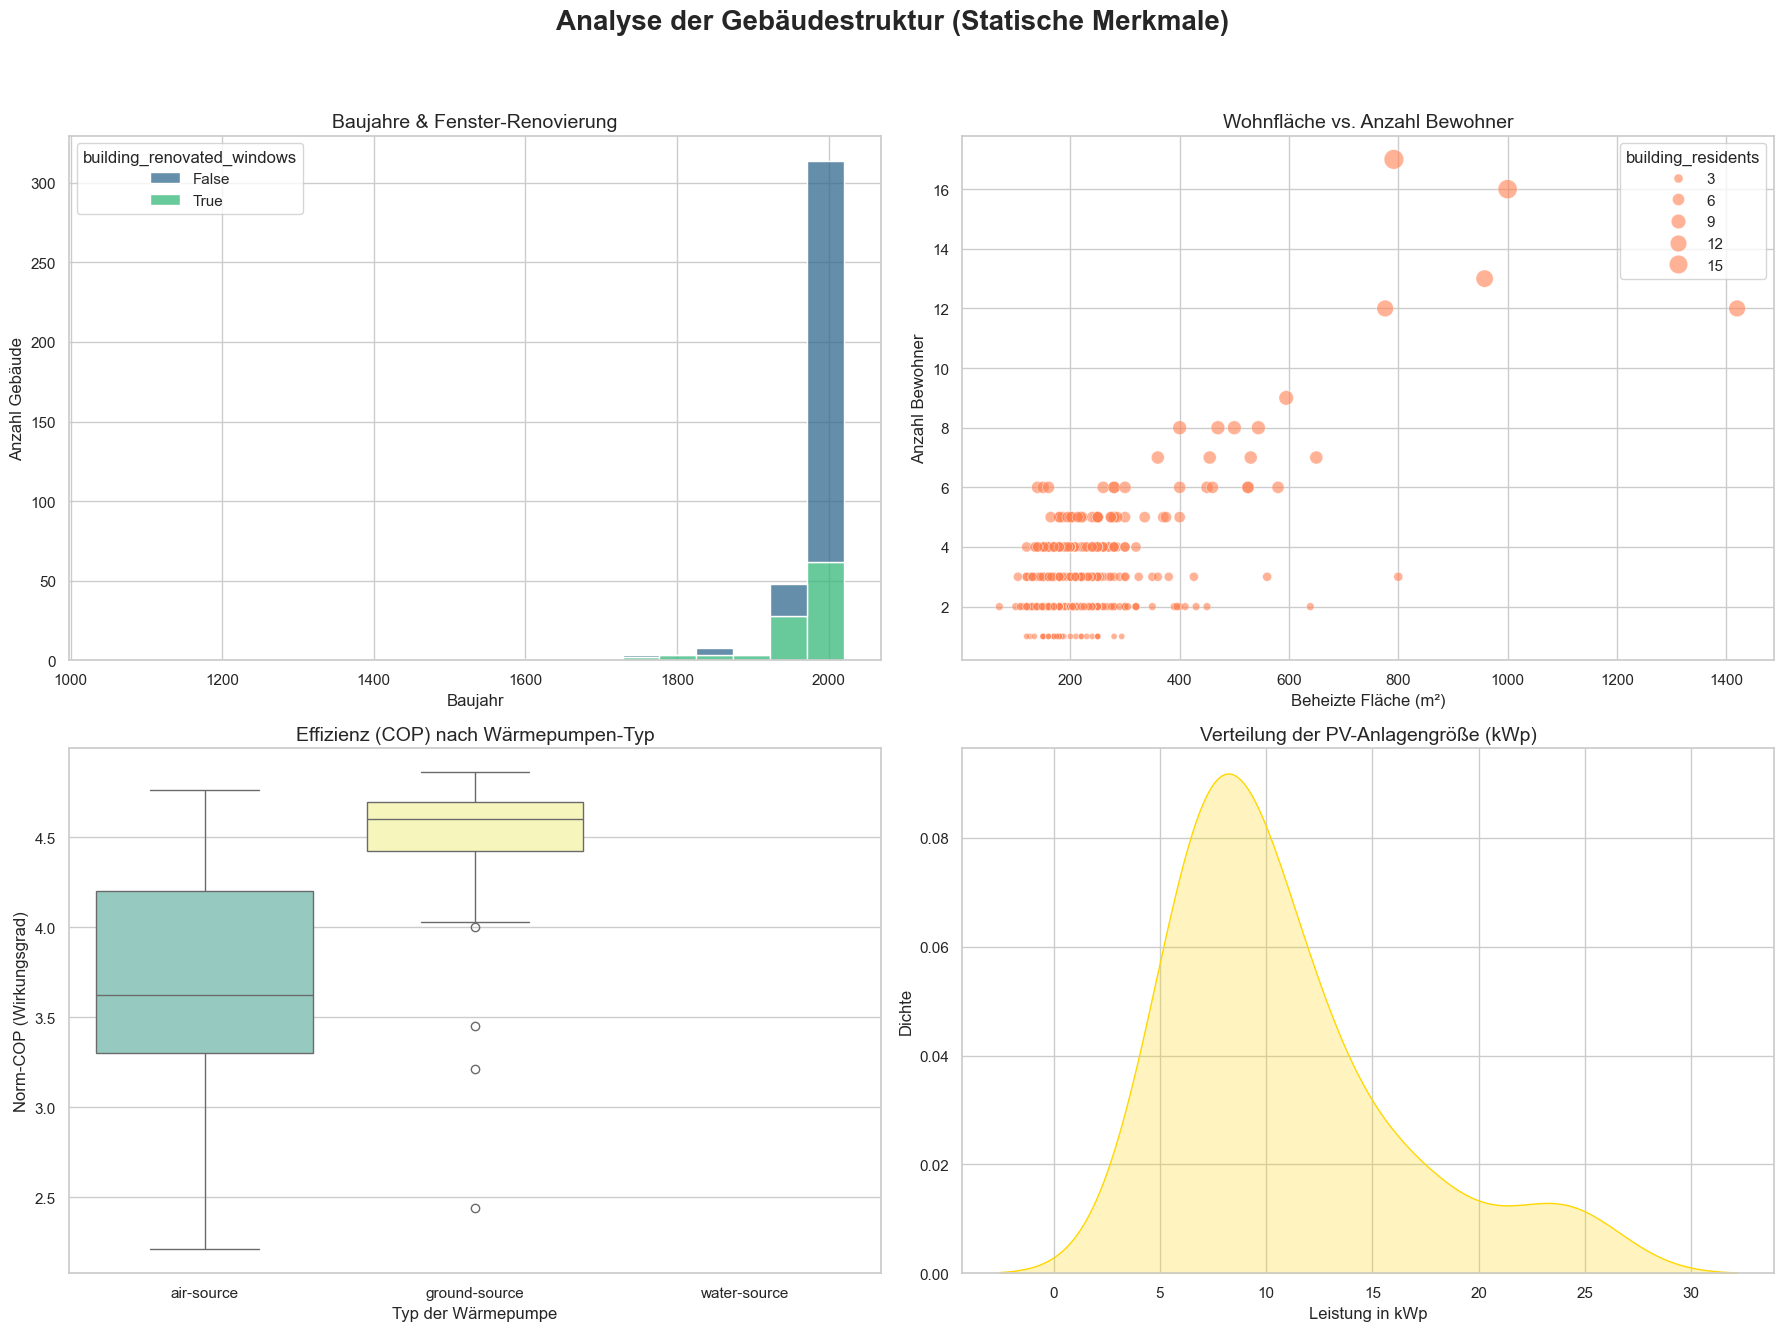

In [7]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

def plot_building_analysis(df: pl.DataFrame):
    # Styling
    sns.set_theme(style="whitegrid")
    fig, axes = plt.subplots(2, 2, figsize=(18, 14))
    fig.suptitle("Analyse der Gebäudestruktur (Statische Merkmale)", fontsize=20, fontweight='bold')

    # 1. Baujahr & Renovierungsstatus
    # Wir kombinieren das Baujahr mit der Info, ob Fenster renoviert wurden
    plt.subplot(2, 2, 1)
    sns.histplot(data=df.to_pandas(), x="building_constructionyear", hue="building_renovated_windows", 
                 multiple="stack", palette="viridis", bins=20)
    plt.title("Baujahre & Fenster-Renovierung", fontsize=14)
    plt.xlabel("Baujahr")
    plt.ylabel("Anzahl Gebäude")

    # 2. Beheizte Fläche vs. Anzahl Bewohner
    # Wichtig für den Warmwasserverbrauch (DHW)
    plt.subplot(2, 2, 2)
    sns.scatterplot(data=df.to_pandas(), x="building_floorareaheated_total", y="building_residents", 
                    alpha=0.6, size="building_residents", sizes=(20, 200), color="coral")
    plt.title("Wohnfläche vs. Anzahl Bewohner", fontsize=14)
    plt.xlabel("Beheizte Fläche (m²)")
    plt.ylabel("Anzahl Bewohner")

    # 3. Wärmepumpen-Technologie nach COP (Wirkungsgrad)
    plt.subplot(2, 2, 3)
    sns.boxplot(data=df.to_pandas(), x="heatpump_installation_type", y="heatpump_installation_normpoint_cop", 
                palette="Set3")
    plt.title("Effizienz (COP) nach Wärmepumpen-Typ", fontsize=14)
    plt.xlabel("Typ der Wärmepumpe")
    plt.ylabel("Norm-COP (Wirkungsgrad)")

    # 4. PV-Größe Verteilung (für die Haushalte mit PV)
    plt.subplot(2, 2, 4)
    pv_data = df.filter(pl.col("building_pvsystem_size") > 0).to_pandas()
    sns.kdeplot(data=pv_data, x="building_pvsystem_size", fill=True, color="gold")
    plt.title("Verteilung der PV-Anlagengröße (kWp)", fontsize=14)
    plt.xlabel("Leistung in kWp")
    plt.ylabel("Dichte")

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

# Aufruf mit deinem Metadaten-DataFrame
plot_building_analysis(household_info)

C:\Users\maxkr\AppData\Local\Temp\ipykernel_26088\1298940223.py:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


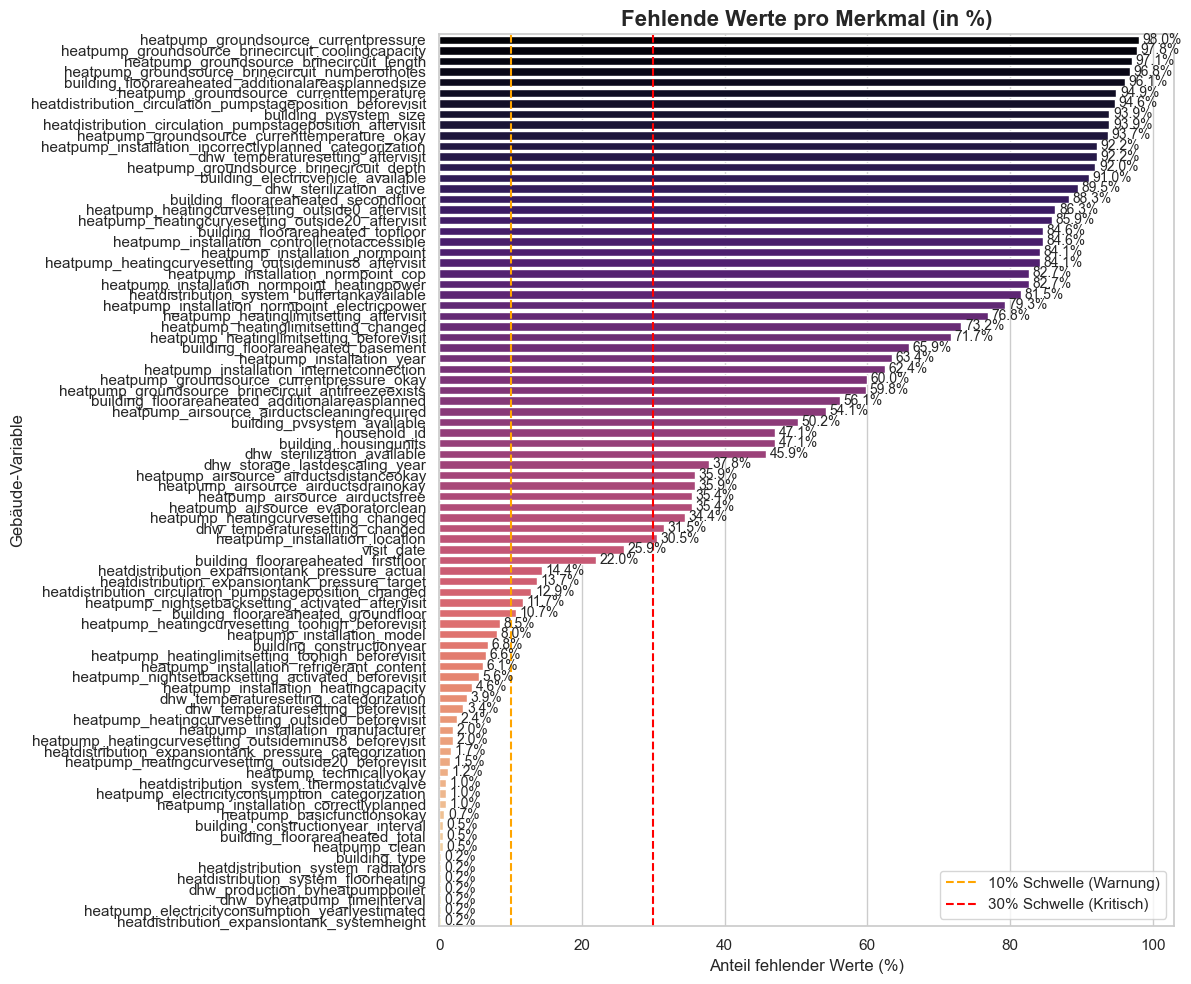

In [9]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

def plot_missing_values(df: pl.DataFrame):
    # 1. Prozentsatz der fehlenden Werte pro Spalte berechnen
    missing_data = df.select([
        (pl.col(c).null_count() / df.height * 100).alias(c)
        for c in df.columns
    ]).unpivot(variable_name="Spalte", value_name="Prozent_Fehlend")

    # 2. Nur Spalten mit fehlenden Werten anzeigen und sortieren
    missing_data = (
        missing_data
        .filter(pl.col("Prozent_Fehlend") > 0)
        .sort("Prozent_Fehlend", descending=True)
    )

    if missing_data.is_empty():
        print("✅ Hervorragend! Keine fehlenden Werte in diesem Datensatz gefunden.")
        return

    # 3. Visualisierung
    plt.figure(figsize=(12, 10))
    sns.set_theme(style="whitegrid")
    
    # Balkendiagramm erstellen
    ax = sns.barplot(
        data=missing_data.to_pandas(), 
        x="Prozent_Fehlend", 
        y="Spalte", 
        palette="magma"
    )

    # Hilfslinien für kritische Schwellenwerte
    plt.axvline(x=10, color='orange', linestyle='--', label='10% Schwelle (Warnung)')
    plt.axvline(x=30, color='red', linestyle='--', label='30% Schwelle (Kritisch)')
    
    plt.title("Fehlende Werte pro Merkmal (in %)", fontsize=16, fontweight='bold')
    plt.xlabel("Anteil fehlender Werte (%)", fontsize=12)
    plt.ylabel("Gebäude-Variable", fontsize=12)
    plt.legend(loc='lower right')
    
    # Prozentzahlen an die Balken schreiben
    for p in ax.patches:
        ax.annotate(f'{p.get_width():.1f}%', 
                    (p.get_width() + 0.5, p.get_y() + p.get_height() / 2), 
                    va='center', fontsize=10)

    plt.tight_layout()
    plt.show()

# Anwendung auf deine Gebäude-Info:
plot_missing_values(household_info)